In [127]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, ElasticNet, ElasticNetCV, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_curve, recall_score, precision_score, f1_score, confusion_matrix
sns.set()

In [65]:
df = pd.read_csv("C:/Users/YSHARMA/Documents/DS Algorithms/Logistic Regression/Logistic-regression_final/Logistic-regression_final/diabetes.csv")

In [66]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [67]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [68]:
cleaned_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000
mean,3.831357,121.604048,72.206306,26.665377,119.147048,32.494764,0.471219,32.805007
std,3.373499,30.357286,12.154978,9.662650,93.520628,6.873584,0.332522,11.113182
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.500000,64.000000,20.536458,79.799479,27.600000,0.243500,24.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.370000,29.000000
75%,6.000000,140.000000,80.000000,32.000000,129.500000,36.600000,0.625000,40.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,66.000000


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:

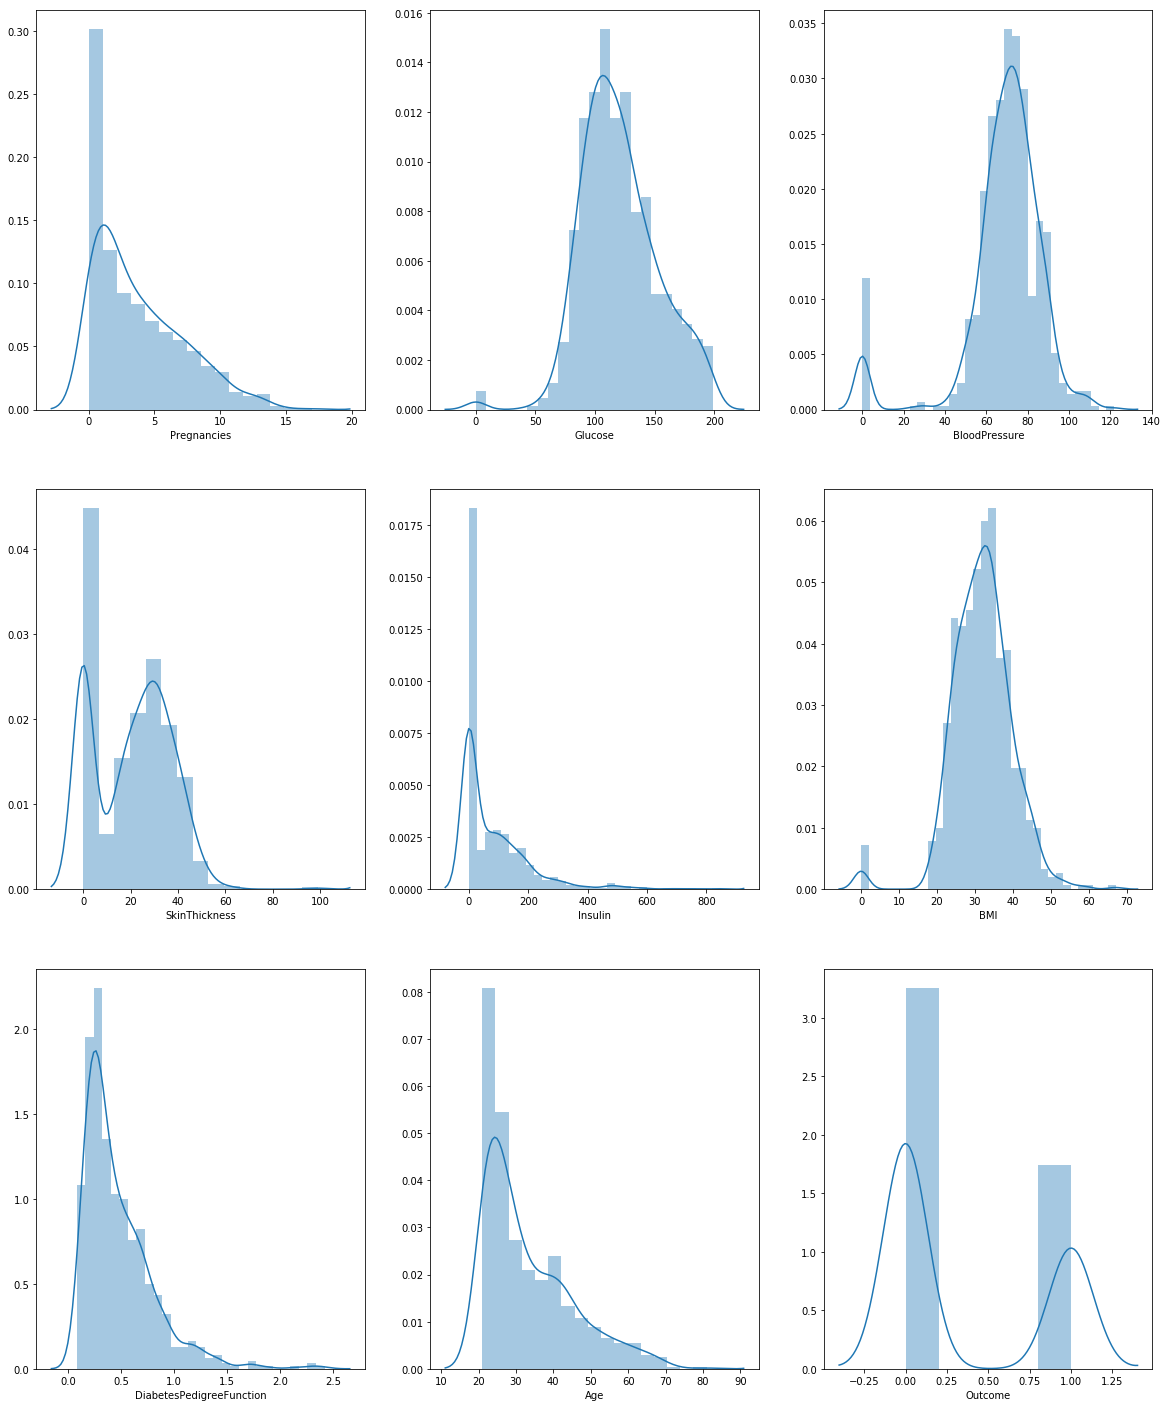

In [69]:
plt.figure(figsize=(20,25), facecolor = 'White')
plot_number = 1

for column in df:
    if plot_number <= 9:
        ax = plt.subplot(3,3,plot_number)
        sns.distplot(df[column])
        plt.xlabel(column)
    plot_number+=1
plt.show()

In [70]:
#replacing zero values with mean values
df['Glucose'] = df['Glucose'].replace(to_replace = 0,value= df['Glucose'].mean())
df['BMI'] = df['BMI'].replace(to_replace = 0, value = df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(to_replace = 0, value = df['BloodPressure'].mean())
df['Insulin'] = df['Insulin'].replace(to_replace = 0, value = df['Insulin'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(to_replace = 0, value = df['SkinThickness'].mean())

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:

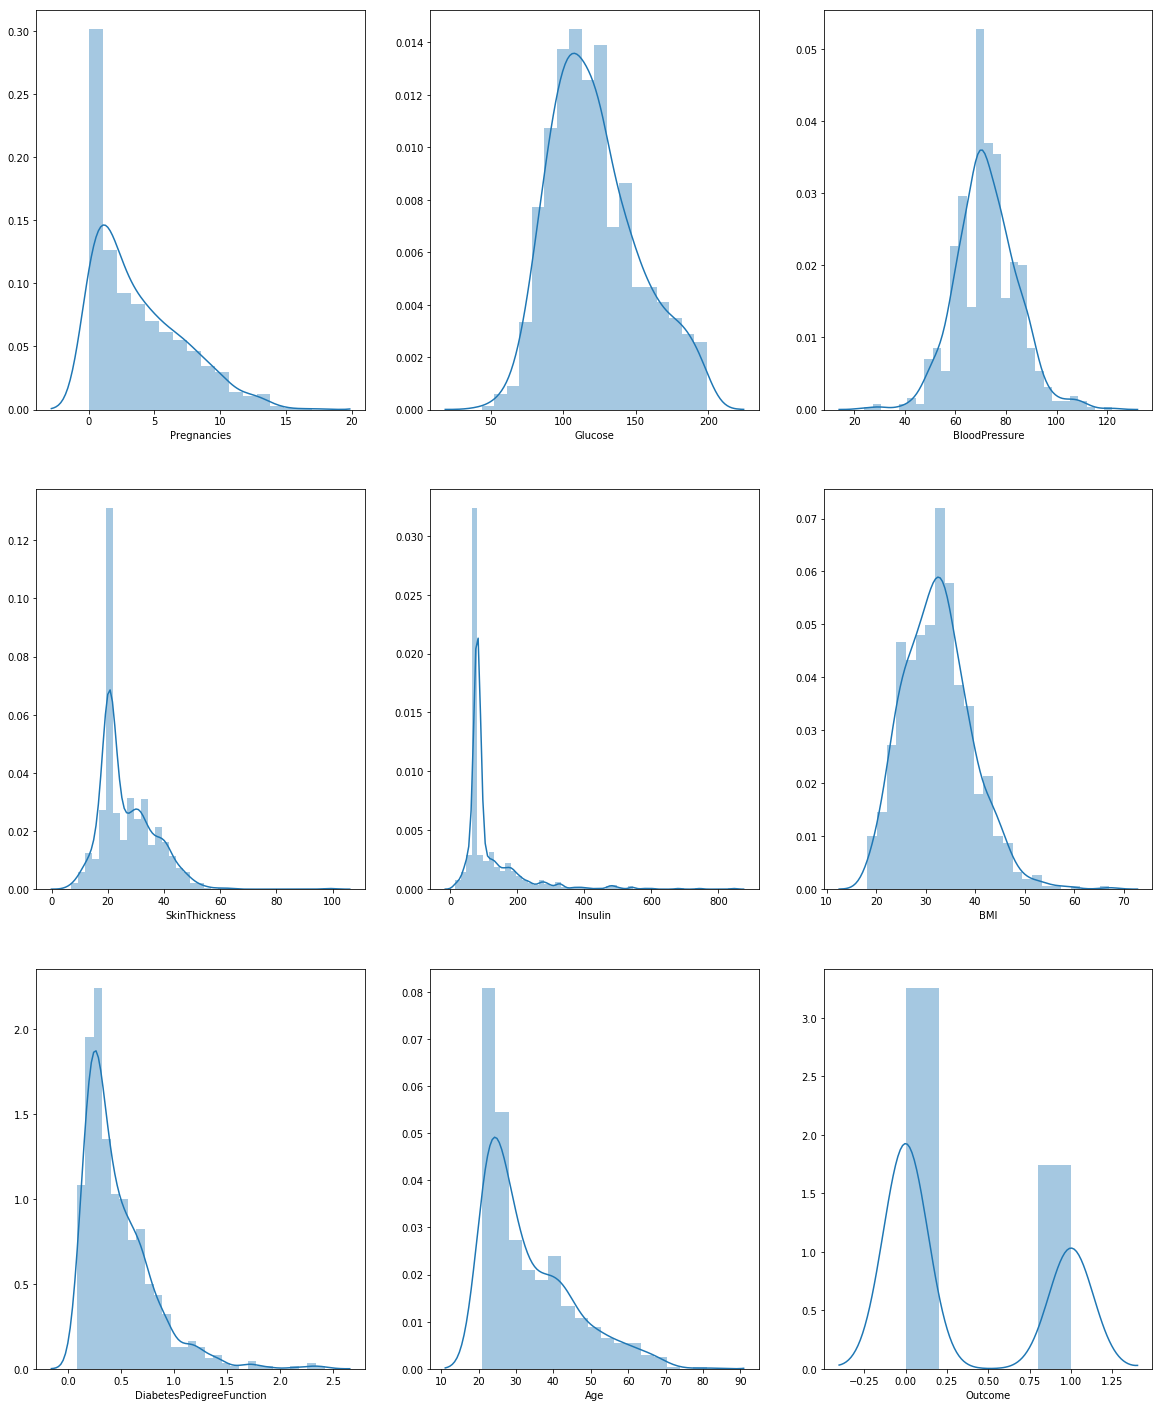

In [71]:
plt.figure(figsize=(20,25), facecolor = 'White')
plot_number = 1

for column in df:
    if plot_number <= 9:
        ax = plt.subplot(3,3,plot_number)
        sns.distplot(df[column])
        plt.xlabel(column)
    plot_number+=1
plt.show()

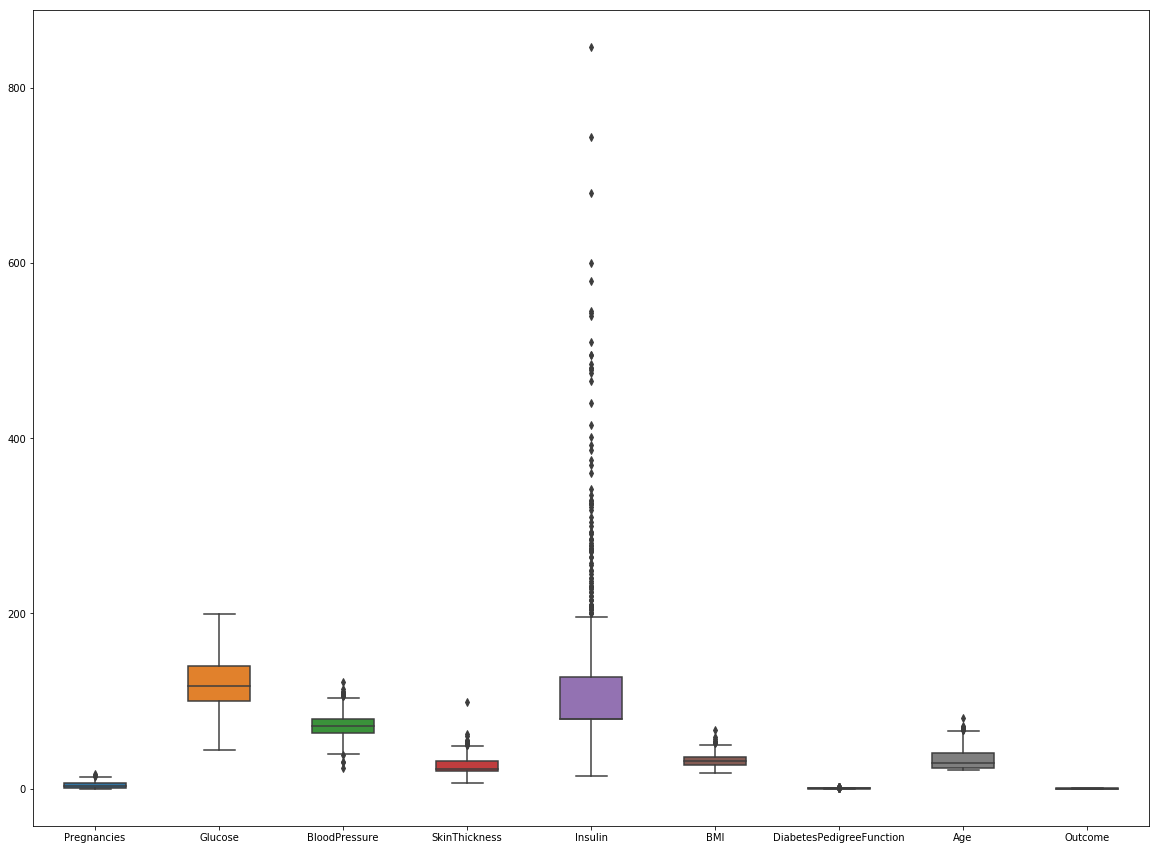

In [73]:
fig, ax = plt.subplots(figsize=(20,15), sharey=True, sharex=True)
sns.boxplot(data=df, width=0.5)

In [74]:
q = df['Insulin'].quantile(0.95)

cleaned_df  = df[df['Insulin'] < q]

q = df['Pregnancies'].quantile(0.99)

cleaned_df  = df[df['Pregnancies'] < q]

q = df['BloodPressure'].quantile(0.98)

cleaned_df  = df[df['BloodPressure'] < q]

q = df['BMI'].quantile(0.98)

cleaned_df  = df[df['BMI'] < q]

q = df['DiabetesPedigreeFunction'].quantile(0.99)

cleaned_df  = df[df['DiabetesPedigreeFunction'] < q]

q = df['Age'].quantile(0.99)

cleaned_df  = df[df['Age'] < q]

In [75]:
cleaned_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.000000,79.799479,33.600000,0.627,50,1
1,1,85.0,66.000000,29.000000,79.799479,26.600000,0.351,31,0
2,8,183.0,64.000000,20.536458,79.799479,23.300000,0.672,32,1
3,1,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21,0
4,0,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33,1
5,5,116.0,74.000000,20.536458,79.799479,25.600000,0.201,30,0
6,3,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26,1
7,10,115.0,69.105469,20.536458,79.799479,35.300000,0.134,29,0
8,2,197.0,70.000000,45.000000,543.000000,30.500000,0.158,53,1
9,8,125.0,96.000000,20.536458,79.799479,31.992578,0.232,54,1


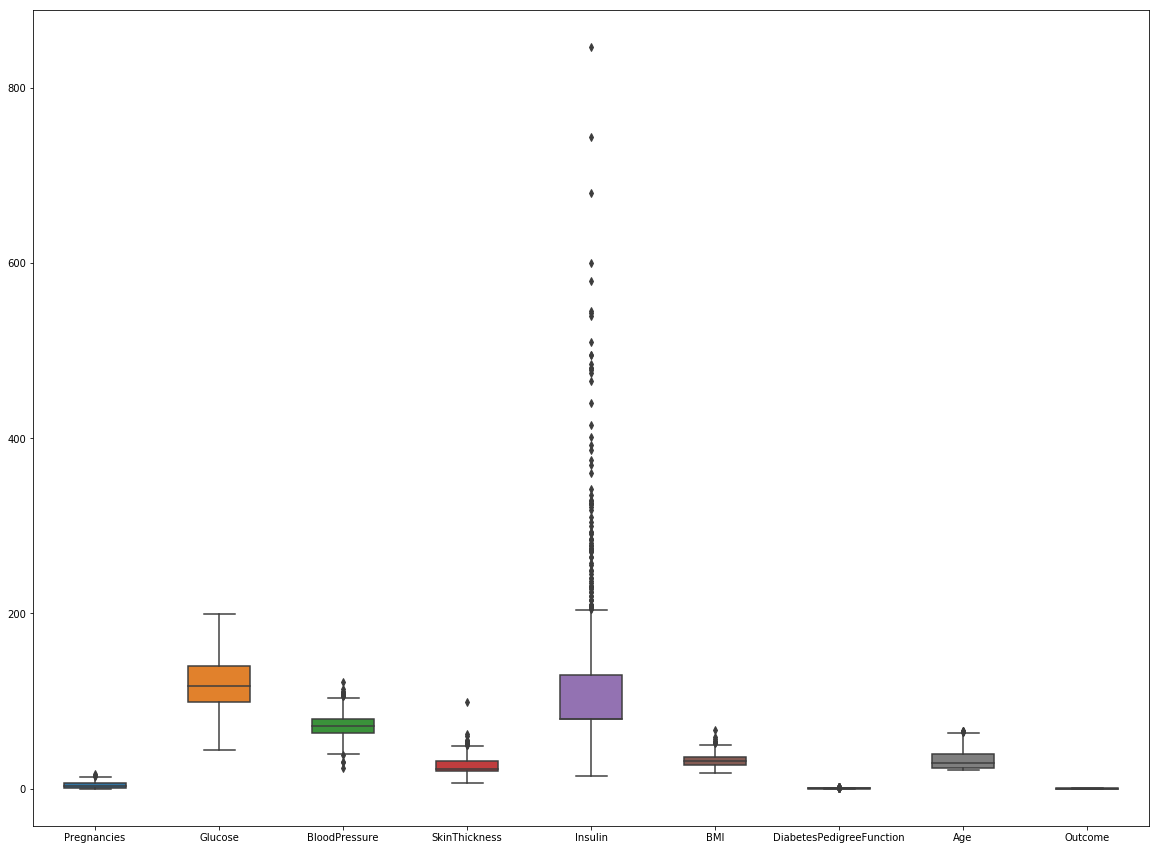

In [76]:
#fig, ax = plt.subplot(figsize=(15,20), sharex = True, sharey = True)
#sns.boxplot(data = cleaned_df)

fig, ax = plt.subplots(figsize=(20,15), sharey=True, sharex=True)
sns.boxplot(data=cleaned_df, width=0.5)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:

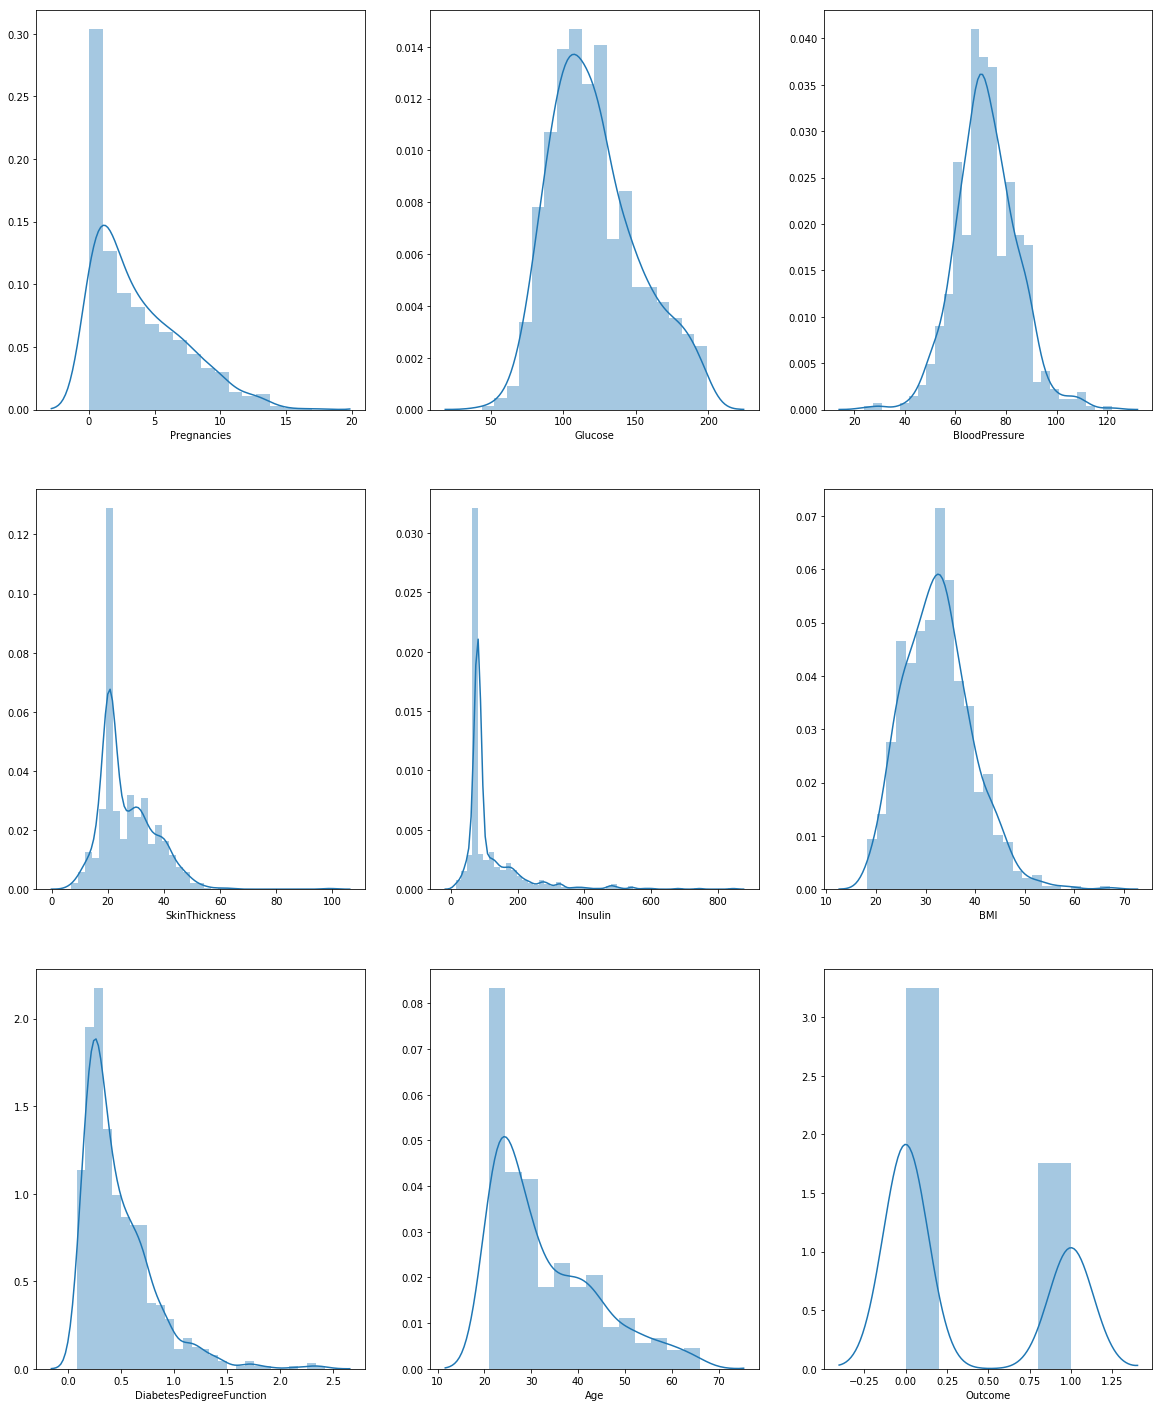

In [77]:
plt.figure(figsize=(20,25), facecolor = 'White')
plot_number = 1

for column in cleaned_df:
    if plot_number <= 9:
        ax = plt.subplot(3,3,plot_number)
        sns.distplot(cleaned_df[column])
        plt.xlabel(column)
    plot_number+=1
plt.show()

In [78]:
X = cleaned_df.drop(["Outcome"], axis=1)


In [95]:
y = cleaned_df['Outcome']

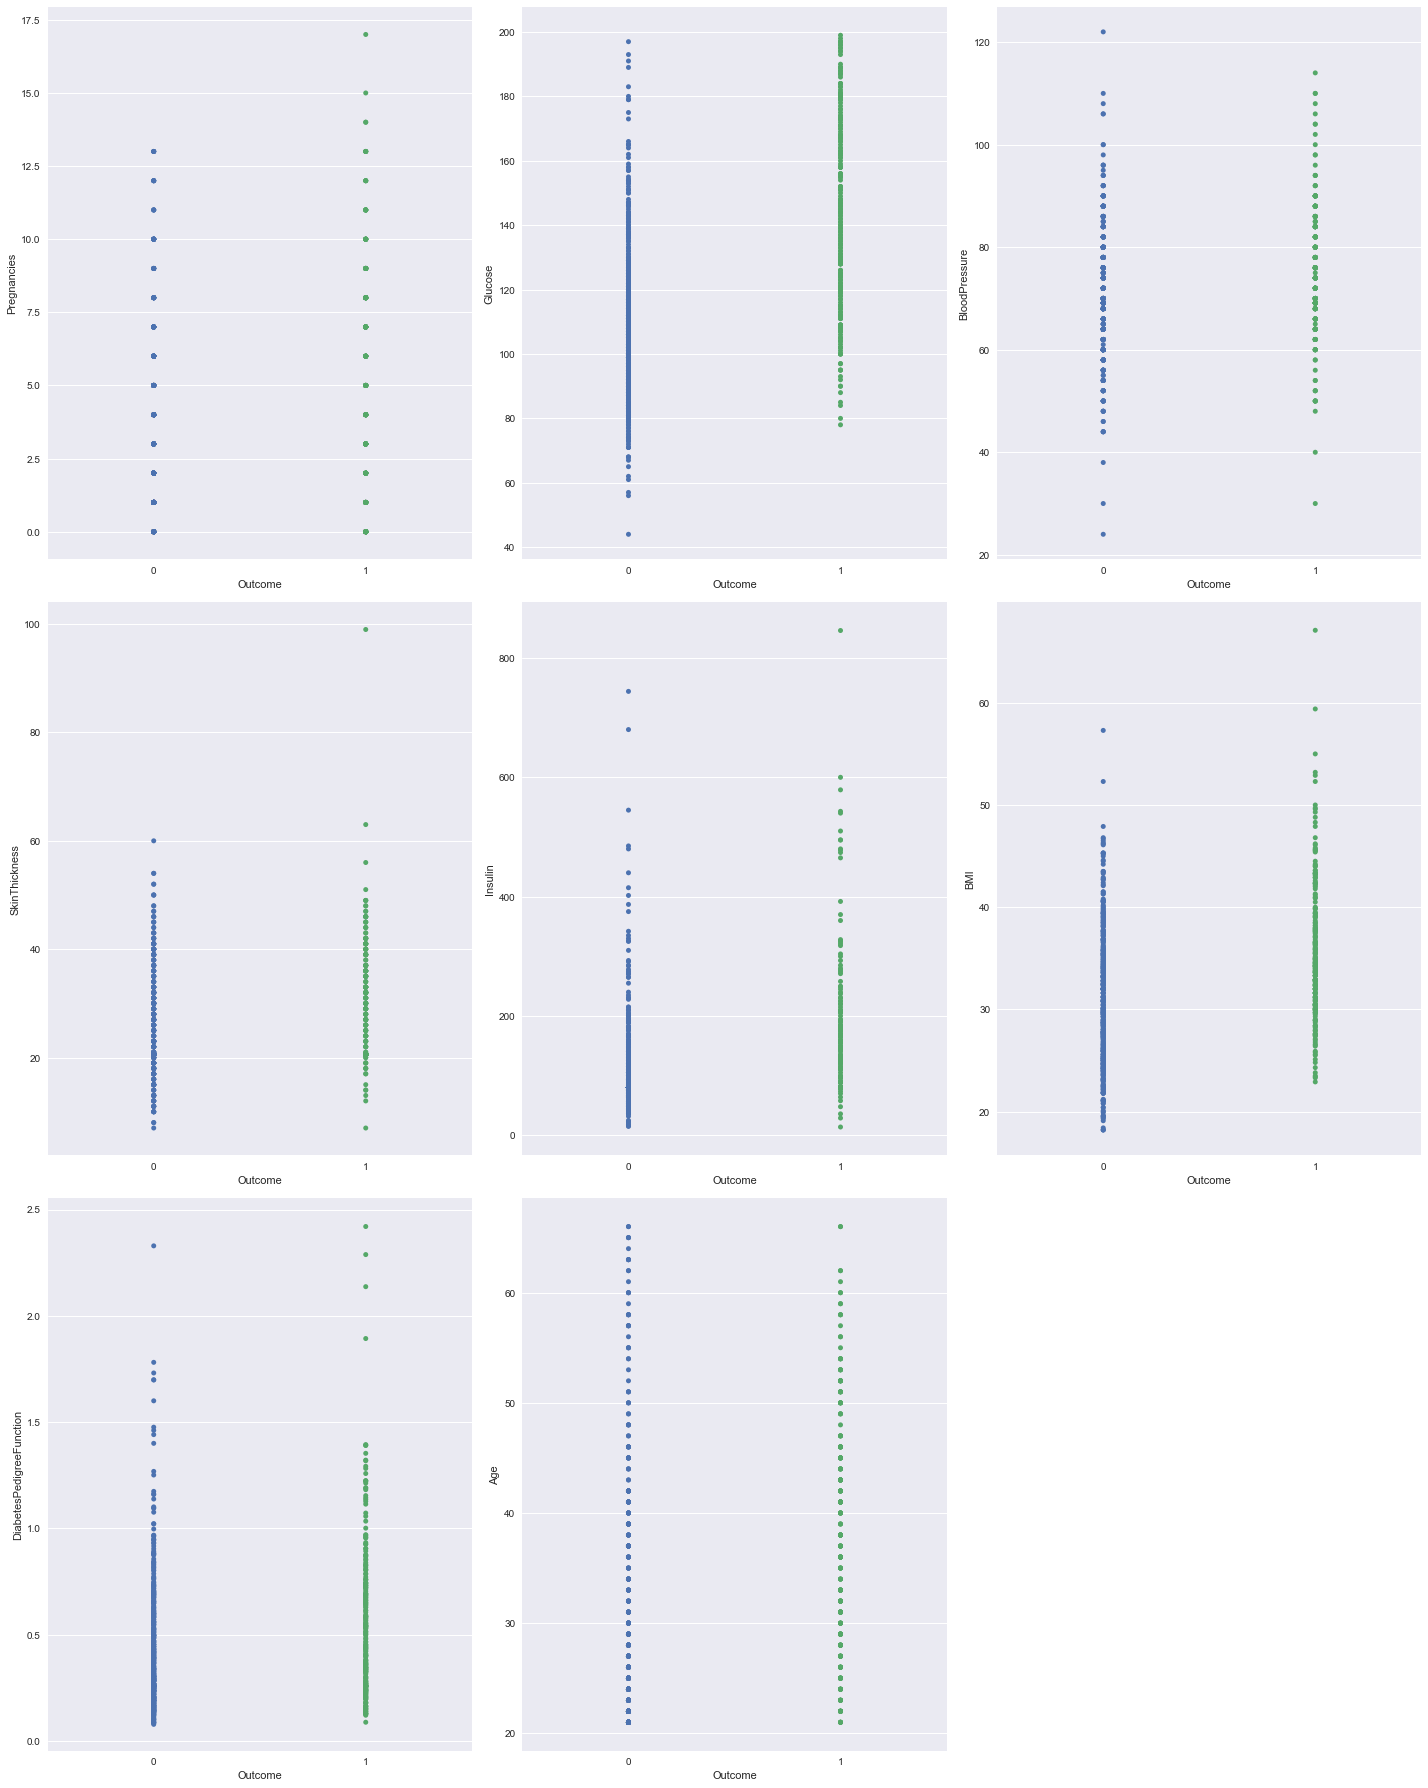

In [99]:
plt.figure(figsize=(20,25), facecolor = 'white')
plot_number = 1

for column in X:
    if plot_number <= 9:
        ax = plt.subplot(3,3,plot_number)
        sns.stripplot(y, X[column])
    plot_number+=1

plt.tight_layout()
    

In [100]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [101]:
X_scaled

array([[ 0.64327075,  0.87008298, -0.01698412, ...,  0.16090077,
         0.46879263,  1.54828125],
       [-0.83984741, -1.20656984, -0.51093456, ..., -0.85816238,
        -0.36177415, -0.16252742],
       [ 1.23651801,  2.02377899, -0.6755847 , ..., -1.33857787,
         0.60421113, -0.07248486],
       ...,
       [ 0.34664712, -0.01991109, -0.01698412, ..., -0.91639456,
        -0.68075995, -0.25256998],
       [-0.83984741,  0.14490263, -1.00488499, ..., -0.3486308 ,
        -0.36779275,  1.27815356],
       [-0.83984741, -0.9428679 , -0.18163427, ..., -0.30495667,
        -0.47010895, -0.88286791]])

In [116]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]

vif['Features']= X.columns
vif

,vif,Features
0,1.484572,Pregnancies
1,1.354580,Glucose
2,1.247898,BloodPressure
3,1.455095,SkinThickness
4,1.264776,Insulin
5,1.551161,BMI
6,1.058847,DiabetesPedigreeFunction
7,1.680199,Age


In [118]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 355)

In [119]:
log_reg = LogisticRegression()

log_reg.fit(X_train,  y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [122]:
import pickle
#model to be saved to file
with open('modelForPrediction.sav',  'wb') as f:
    pickle.dump(log_reg, f)

with open('standardscaler.sav', 'wb') as f:
    pickle.dump(scaler, f)

In [123]:
y_pred = log_reg.predict(X_test)

In [126]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.743421052631579

In [129]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[84, 13],
       [26, 29]], dtype=int64)

In [131]:
recall = recall_score(y_test, y_pred)
recall

0.5272727272727272

In [133]:
precision = precision_score(y_test, y_pred)
precision

0.6904761904761905

In [136]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred)
auc

0.6966260543580132